# pycisTopic analysis

Full dataset, using consensus peak regions.

In [45]:
import pycisTopic
%load_ext nb_black
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import pickle
import pandas as pd
import os

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [46]:
!pwd

/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged


<IPython.core.display.Javascript object>

# Subset

In [3]:
wdir = '/lustre1/project/stg_00090/scatac_benchmark/fixedcells_4_merged'
os.chdir( wdir )

<IPython.core.display.Javascript object>

In [4]:
path = "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.dimreduc.consensus_harmony.pkl"

<IPython.core.display.Javascript object>

In [5]:
with open(path, 'rb') as f:
    cto = pickle.load(f)

<IPython.core.display.Javascript object>

In [6]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(cto.cell_data.groupby(["harmony_consensus_cell_type__mega","tech"])["fmx_sample"].value_counts())

harmony_consensus_cell_type__mega  tech         fmx_sample
B cell                             10xmultiome  sampleA       1097
                                                sampleB        706
                                   10xv1        sampleA        552
                                                sampleB        463
                                   10xv11       sampleA        905
                                                sampleB        655
                                   10xv2        sampleA       1097
                                                sampleB        652
                                   ddseq        sampleA        766
                                                sampleB        442
                                   hydrop       sampleB        617
                                                sampleA        561
                                   mtscatac     sampleA       1295
                                                sampleB        847
   

<IPython.core.display.Javascript object>

In [7]:
f_fmx = 'out_fmx/genotype_concordance_unified.txt'
fmx = pd.read_csv(f_fmx, sep='\t')
fmx

,INT_ID,BARCODE,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,BEST.LLK,NEXT.GUESS,NEXT.LLK,DIFF.LLK.BEST.NEXT,...,SNG.BEST.LLK,SNG.NEXT.GUESS,SNG.NEXT.LLK,SNG.ONLY.POSTERIOR,DBL.BEST.GUESS,DBL.BEST.LLK,DIFF.LLK.SNG.DBL,ubarcode,replicate,sample
CNA_hydrop_2.FIXEDCELLS.1,0,CGACATTACATAGGAGTCAA,182,182,SNG,"1,1",-324.11,"1,0",-343.05,18.94,...,-324.11,0,-373.28,1.0,"1,0",-343.05,18.94,CNA_hydrop_2.FIXEDCELLS#CGACATTACATAGGAGTCAA,CNA_hydrop_2.FIXEDCELLS,sampleB
CNA_hydrop_2.FIXEDCELLS.2,1,GGCAACCTCTGAGCTAGTAA,209,209,SNG,"0,0",-369.10,"1,0",-390.29,21.19,...,-369.10,1,-426.11,1.0,"1,0",-390.29,21.19,CNA_hydrop_2.FIXEDCELLS#GGCAACCTCTGAGCTAGTAA,CNA_hydrop_2.FIXEDCELLS,sampleA
CNA_hydrop_2.FIXEDCELLS.3,2,CAACACCATTTCTCGCACGA,273,273,SNG,"0,0",-492.20,"1,0",-520.48,28.28,...,-492.20,1,-576.63,1.0,"1,0",-520.48,28.28,CNA_hydrop_2.FIXEDCELLS#CAACACCATTTCTCGCACGA,CNA_hydrop_2.FIXEDCELLS,sampleA
CNA_hydrop_2.FIXEDCELLS.4,3,TGCATGAGGTTACGGACGGT,354,354,SNG,"1,1",-636.69,"1,0",-669.83,33.14,...,-636.69,0,-734.25,1.0,"1,0",-669.83,33.14,CNA_hydrop_2.FIXEDCELLS#TGCATGAGGTTACGGACGGT,CNA_hydrop_2.FIXEDCELLS,sampleB
CNA_hydrop_2.FIXEDCELLS.5,4,ACAGTGAAGATCCAGTGTTC,577,577,SNG,"0,0",-1069.99,"1,0",-1093.26,23.27,...,-1069.99,1,-1173.29,1.0,"1,0",-1093.26,23.27,CNA_hydrop_2.FIXEDCELLS#ACAGTGAAGATCCAGTGTTC,CNA_hydrop_2.FIXEDCELLS,sampleA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIB_hydrop_12.FIXEDCELLS.1417,1416,GTCGTTGAGAGTGACCAGTA,126,126,SNG,"1,1",-221.86,"1,0",-240.94,19.08,...,-221.86,0,-283.50,1.0,"1,0",-240.94,19.08,VIB_hydrop_12.FIXEDCELLS#GTCGTTGAGAGTGACCAGTA,VIB_hydrop_12.FIXEDCELLS,sampleB
VIB_hydrop_12.FIXEDCELLS.1418,1417,ACCGAAGGCTTTGCAGTTCT,103,103,SNG,"1,1",-185.75,"1,0",-198.81,13.06,...,-185.75,0,-226.20,1.0,"1,0",-198.81,13.06,VIB_hydrop_12.FIXEDCELLS#ACCGAAGGCTTTGCAGTTCT,VIB_hydrop_12.FIXEDCELLS,sampleB
VIB_hydrop_12.FIXEDCELLS.1419,1418,TAGAGCCTGATTGTGTAGGA,115,115,SNG,"1,1",-207.21,"1,0",-219.27,12.06,...,-207.21,0,-244.26,1.0,"1,0",-219.27,12.06,VIB_hydrop_12.FIXEDCELLS#TAGAGCCTGATTGTGTAGGA,VIB_hydrop_12.FIXEDCELLS,sampleB
VIB_hydrop_12.FIXEDCELLS.1420,1419,CAATTGGAGACCACACGGAT,101,101,SNG,"1,1",-177.98,"1,0",-188.29,10.31,...,-177.98,0,-214.34,1.0,"1,0",-188.29,10.31,VIB_hydrop_12.FIXEDCELLS#CAATTGGAGACCACACGGAT,VIB_hydrop_12.FIXEDCELLS,sampleB


<IPython.core.display.Javascript object>

In [8]:
# create an annotation df:
fmx['cell_names'] = fmx['BARCODE'] + "___" + fmx['replicate']

fmx_annot = fmx[['DROPLET.TYPE','sample','cell_names']].copy().set_index('cell_names')
fmx_annot.columns = ['fmx_droplet_type','fmx_sample']
fmx_annot

,fmx_droplet_type,fmx_sample
cell_names,,
CGACATTACATAGGAGTCAA___CNA_hydrop_2.FIXEDCELLS,SNG,sampleB
GGCAACCTCTGAGCTAGTAA___CNA_hydrop_2.FIXEDCELLS,SNG,sampleA
CAACACCATTTCTCGCACGA___CNA_hydrop_2.FIXEDCELLS,SNG,sampleA
TGCATGAGGTTACGGACGGT___CNA_hydrop_2.FIXEDCELLS,SNG,sampleB
ACAGTGAAGATCCAGTGTTC___CNA_hydrop_2.FIXEDCELLS,SNG,sampleA
...,...,...
GTCGTTGAGAGTGACCAGTA___VIB_hydrop_12.FIXEDCELLS,SNG,sampleB
ACCGAAGGCTTTGCAGTTCT___VIB_hydrop_12.FIXEDCELLS,SNG,sampleB
TAGAGCCTGATTGTGTAGGA___VIB_hydrop_12.FIXEDCELLS,SNG,sampleB


<IPython.core.display.Javascript object>

In [9]:
fmx_annot = fmx_annot.loc[[x for x in fmx_annot.index if "VIB_hydrop" in x]]
fmx_annot.index = [x.replace("___VIB_hydrop_11", "-1___VIB_hydrop_1").replace("___VIB_hydrop_12","-2___VIB_hydrop_1").replace("___VIB_hydrop_21", "-1___VIB_hydrop_2").replace("___VIB_hydrop_22", "-2___VIB_hydrop_2") for x in fmx_annot.index]

<IPython.core.display.Javascript object>

In [10]:
fmx_annot = fmx_annot[fmx_annot["fmx_droplet_type"] == "SNG"]

<IPython.core.display.Javascript object>

In [11]:
for idx in fmx_annot.index:
    if idx in cto.cell_data.index:
        cto.cell_data.at[idx, "fmx_sample"] = fmx_annot.at[idx, "fmx_sample"]

<IPython.core.display.Javascript object>

In [12]:
cto.cell_data["fmx_sample"]

TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXEDCELLS        NaN
ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXEDCELLS        NaN
GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXEDCELLS        NaN
CTCTCTACTGAACGGCGTCTGCTTCC___OHS_s3atac_2.FIXEDCELLS        NaN
ATTGAGGAAATGATGCTCCTGCTTCC___OHS_s3atac_2.FIXEDCELLS        NaN
                                                         ...   
TTCTTAGACTTCTGAG___MDC_mtscatac_1.FIXEDCELLS            sampleB
CATCAGAACCCGGACT___MDC_mtscatac_1.FIXEDCELLS            sampleA
GAACCATACTACACTG___MDC_mtscatac_1.FIXEDCELLS            sampleA
CAGTTGATGGCACGCT___MDC_mtscatac_1.FIXEDCELLS            sampleA
ACCTCGTTGAGTTGAA___MDC_mtscatac_1.FIXEDCELLS            sampleA
Name: fmx_sample, Length: 169227, dtype: object

<IPython.core.display.Javascript object>

In [13]:
cto.cell_data.groupby(["tech","harmony_consensus_cell_type__mega"])["fmx_sample"].value_counts()

tech         harmony_consensus_cell_type__mega  fmx_sample
10xmultiome  B cell                             sampleA       1097
                                                sampleB        706
             CD14+ monocyte                     sampleB       1994
                                                sampleA       1604
             CD16+ monocyte                     sampleA        758
                                                              ... 
s3atac       Cytotoxic T cell                   sampleB        449
             Dendritic cell                     sampleA         44
                                                sampleB         20
             Natural killer cell                sampleA        131
                                                sampleB        123
Name: fmx_sample, Length: 112, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
df = pd.DataFrame(cto.cell_data.groupby(["tech","harmony_consensus_cell_type__mega"])["fmx_sample"].value_counts())
df.columns = ["counts"]
df = df.reset_index()
df

,tech,harmony_consensus_cell_type__mega,fmx_sample,counts
0,10xmultiome,B cell,sampleA,1097
1,10xmultiome,B cell,sampleB,706
2,10xmultiome,CD14+ monocyte,sampleB,1994
3,10xmultiome,CD14+ monocyte,sampleA,1604
4,10xmultiome,CD16+ monocyte,sampleA,758
...,...,...,...,...
107,s3atac,Cytotoxic T cell,sampleB,449
108,s3atac,Dendritic cell,sampleA,44
109,s3atac,Dendritic cell,sampleB,20
110,s3atac,Natural killer cell,sampleA,131


<IPython.core.display.Javascript object>

In [15]:
df.groupby(["harmony_consensus_cell_type__mega", "fmx_sample"])["counts"].min()

harmony_consensus_cell_type__mega  fmx_sample
B cell                             sampleA       254
                                   sampleB       146
CD14+ monocyte                     sampleA       309
                                   sampleB       299
CD16+ monocyte                     sampleA        83
                                   sampleB        32
CD4+ T cell                        sampleA       228
                                   sampleB       230
Cytotoxic T cell                   sampleA       719
                                   sampleB       449
Dendritic cell                     sampleA        44
                                   sampleB        11
Natural killer cell                sampleA        13
                                   sampleB         7
Name: counts, dtype: int64

<IPython.core.display.Javascript object>

# omit the technique with least cells in each category
otherwise some cell types only have ~10 cells each while most techs have hundreds of cells available

In [16]:
min_dict = {}
min_tech_dict = {}
for cell_type in df["harmony_consensus_cell_type__mega"].unique():
    print(cell_type)
    df_sub = df[df["harmony_consensus_cell_type__mega"] == cell_type]
    
    
    df_sub_sub = pd.DataFrame(df_sub.groupby(["tech"])["counts"].sum()) #sum total counts across male/female
    df_sub_sub["rank"] = df_sub_sub["counts"].rank() # rank techs by total count
    df_sub_sub_least_tech = df_sub_sub["counts"].idxmin() # find tech that has least total count

    df_sub = df_sub[df_sub["tech"] != df_sub_sub_least_tech] # remove that tech now
    min_dict[cell_type] = df_sub["counts"].min() # get minimum count out of techs that are left
    min_tech_dict[cell_type] = df_sub_sub_least_tech

B cell
CD14+ monocyte
CD16+ monocyte
CD4+ T cell
Cytotoxic T cell
Dendritic cell
Natural killer cell


<IPython.core.display.Javascript object>

In [17]:
min_dict

{'B cell': 442,
 'CD14+ monocyte': 671,
 'CD16+ monocyte': 54,
 'CD4+ T cell': 1301,
 'Cytotoxic T cell': 635,
 'Dendritic cell': 11,
 'Natural killer cell': 123}

<IPython.core.display.Javascript object>

In [18]:
min_tech_dict

{'B cell': 's3atac',
 'CD14+ monocyte': 's3atac',
 'CD16+ monocyte': 's3atac',
 'CD4+ T cell': 's3atac',
 'Cytotoxic T cell': 's3atac',
 'Dendritic cell': 's3atac',
 'Natural killer cell': 'ddseq'}

<IPython.core.display.Javascript object>

## Ok, this is too biased towards s3-atac (and makes sense because only 2 samples)

In [19]:
df

,tech,harmony_consensus_cell_type__mega,fmx_sample,counts
0,10xmultiome,B cell,sampleA,1097
1,10xmultiome,B cell,sampleB,706
2,10xmultiome,CD14+ monocyte,sampleB,1994
3,10xmultiome,CD14+ monocyte,sampleA,1604
4,10xmultiome,CD16+ monocyte,sampleA,758
...,...,...,...,...
107,s3atac,Cytotoxic T cell,sampleB,449
108,s3atac,Dendritic cell,sampleA,44
109,s3atac,Dendritic cell,sampleB,20
110,s3atac,Natural killer cell,sampleA,131


<IPython.core.display.Javascript object>

In [20]:
df.groupby(["harmony_consensus_cell_type__mega", "fmx_sample"])["counts"].min()

harmony_consensus_cell_type__mega  fmx_sample
B cell                             sampleA       254
                                   sampleB       146
CD14+ monocyte                     sampleA       309
                                   sampleB       299
CD16+ monocyte                     sampleA        83
                                   sampleB        32
CD4+ T cell                        sampleA       228
                                   sampleB       230
Cytotoxic T cell                   sampleA       719
                                   sampleB       449
Dendritic cell                     sampleA        44
                                   sampleB        11
Natural killer cell                sampleA        13
                                   sampleB         7
Name: counts, dtype: int64

<IPython.core.display.Javascript object>

let's do this: we cap the maxim number of cells to the 3rd lowest rank number. all techs that do not attain this amount just use the amount they have instead.

In [21]:
min_dict = {}
min_tech_dict = {}
for cell_type in df["harmony_consensus_cell_type__mega"].unique():
    print(cell_type)
    df_sub = df[df["harmony_consensus_cell_type__mega"] == cell_type]
    
    
    df_sub_sub = pd.DataFrame(df_sub.groupby(["tech"])["counts"].sum()) #sum total counts across male/female
    df_sub_sub["rank"] = df_sub_sub["counts"].rank() # rank techs by total count
    df_sub_sub_least_tech = df_sub_sub[df_sub_sub["rank"] >=3] # take only rank #6 or better
    techs_allowed = df_sub_sub_least_tech.index

    print(df_sub_sub_least_tech)
    min_tech_dict[cell_type] = df_sub_sub_least_tech["rank"].idxmin() # find tech that has least amount in there
    min_dict[cell_type] = df_sub[df_sub["tech"].isin(techs_allowed)]["counts"].min() # get minimum count out of techs that are left


B cell
             counts  rank
tech                     
10xmultiome    1803   7.0
10xv11         1560   4.0
10xv2          1749   6.0
ddseq          1208   3.0
hydrop         1696   5.0
mtscatac       2142   8.0
CD14+ monocyte
             counts  rank
tech                     
10xmultiome    3598   6.0
10xv1          3069   4.0
10xv11         3169   5.0
10xv2          3030   3.0
hydrop         6080   8.0
mtscatac       3889   7.0
CD16+ monocyte
             counts  rank
tech                     
10xmultiome    1059   8.0
10xv1           568   5.0
10xv11          911   6.0
10xv2           961   7.0
ddseq           260   3.0
mtscatac        515   4.0
CD4+ T cell
             counts  rank
tech                     
10xmultiome    4206   5.0
10xv11         3853   4.0
10xv2          4549   7.0
ddseq          3570   3.0
hydrop         4542   6.0
mtscatac       6839   8.0
Cytotoxic T cell
             counts  rank
tech                     
10xmultiome    3554   6.0
10xv11         2602   3.

<IPython.core.display.Javascript object>

# ok that seems quite reasonable.
Now, subset

In [22]:
import random


<IPython.core.display.Javascript object>

In [51]:
bcs_merged = []
bcs_dict = {}
cto.cell_data["tech_fmx_sample"] = cto.cell_data["tech"] + "_"+ cto.cell_data["fmx_sample"]
# df_cell_data = cto.cell_data.loc[cto.cell_data["tech_fmx_sample"].dropna().index]
df_cell_data = cto.cell_data
df_cell_data["tech_fmx_sample"] = df_cell_data["tech_fmx_sample"].fillna("SKIP")
for tech in df_cell_data["tech_fmx_sample"].unique():
    bcs_tech = []
    for cell_type in df_cell_data["harmony_consensus_cell_type__mega"].unique():
        if tech != "SKIP":
            df_tmp = df_cell_data[
                (df_cell_data["tech_fmx_sample"] == tech)
                & (df_cell_data["harmony_consensus_cell_type__mega"] == cell_type)
            ]
            if len(df_tmp) >= min_dict[cell_type]:
                bcs = random.sample(list(df_tmp.index), min_dict[cell_type])
                print(len(bcs))
            elif len(df_tmp) == 0:
                print(f"no bc for {cell_type} in {tech}")
                
            else:
                print(f"fewer than {min_dict[cell_type]} cells for {cell_type} in {tech}, only {len(df_tmp)}")
                bcs = list(df_tmp.index)
                
            bcs_merged = bcs_merged + bcs
            bcs_tech = bcs_tech + bcs
        bcs_dict[tech] = bcs_tech

857
1591
232
972
442
54
71
857
1591
232
972
442
54
71
fewer than 857 cells for Cytotoxic T cell in s3atac_sampleA, only 719
fewer than 1591 cells for CD4+ T cell in s3atac_sampleA, only 228
fewer than 232 cells for Natural killer cell in s3atac_sampleA, only 131
fewer than 972 cells for CD14+ monocyte in s3atac_sampleA, only 309
fewer than 442 cells for B cell in s3atac_sampleA, only 254
54
fewer than 71 cells for Dendritic cell in s3atac_sampleA, only 44
fewer than 857 cells for Cytotoxic T cell in s3atac_sampleB, only 449
fewer than 1591 cells for CD4+ T cell in s3atac_sampleB, only 230
fewer than 232 cells for Natural killer cell in s3atac_sampleB, only 123
fewer than 972 cells for CD14+ monocyte in s3atac_sampleB, only 299
fewer than 442 cells for B cell in s3atac_sampleB, only 146
fewer than 54 cells for CD16+ monocyte in s3atac_sampleB, only 32
fewer than 71 cells for Dendritic cell in s3atac_sampleB, only 20
857
1591
232
972
442
54
71
857
1591
232
972
442
54
71
857
1591
232
972


<IPython.core.display.Javascript object>

In [63]:
for tech in cto.cell_data["tech"].unique():
    print(tech)
    bc_tech = []
    for sample in ["sampleA", "sampleB"]:
        bcs = bcs_dict[tech + "_" + sample]
        bc_tech = bc_tech + bcs
    print(len(bc_tech))
    cto_subset = cto.subset(cells=bc_tech, copy=True)
    
    with open(
            f"male_female_celltypefaircto/{tech}_malefemalecelltypefair.pkl",'wb'
    ) as f:
        pickle.dump(cto_subset, f, protocol=4)

10xmultiome
8438
s3atac
3038
10xv11
8438
hydrop
8438
10xv2
8438
ddseq
7333
mtscatac
8438
10xv1
7926


<IPython.core.display.Javascript object>

# or, subset with imputed acc

In [23]:
bcs_merged = []
bcs_dict = {}
cto.cell_data["tech_fmx_sample"] = cto.cell_data["tech"] + "_"+ cto.cell_data["fmx_sample"]
# df_cell_data = cto.cell_data.loc[cto.cell_data["tech_fmx_sample"].dropna().index]
df_cell_data = cto.cell_data
df_cell_data["tech_fmx_sample"] = df_cell_data["tech_fmx_sample"].fillna("SKIP")
for cell_type in df_cell_data["harmony_consensus_cell_type__mega"].unique():
    for tech in df_cell_data["tech_fmx_sample"].unique():
        if tech != "SKIP":
            df_tmp = df_cell_data[
                (df_cell_data["tech_fmx_sample"] == tech)
                & (df_cell_data["harmony_consensus_cell_type__mega"] == cell_type)
            ]
            if len(df_tmp) >= min_dict[cell_type]:
                bcs = random.sample(list(df_tmp.index), min_dict[cell_type])
                print(len(bcs))
            elif len(df_tmp) == 0:
                print(f"no bc for {cell_type} in {tech}")
                
            else:
                print(f"fewer than {min_dict[cell_type]} cells for {cell_type} in {tech}, only {len(df_tmp)}")
                bcs = list(df_tmp.index)
                
            bcs_merged = bcs_merged + bcs
            
        bcs_dict[sample]

857
857
fewer than 857 cells for Cytotoxic T cell in s3atac_sampleA, only 719
fewer than 857 cells for Cytotoxic T cell in s3atac_sampleB, only 449
857
857
857
857
857
857
857
857
857
857
857
fewer than 857 cells for Cytotoxic T cell in 10xv1_sampleB, only 635
1591
1591
fewer than 1591 cells for CD4+ T cell in s3atac_sampleA, only 228
fewer than 1591 cells for CD4+ T cell in s3atac_sampleB, only 230
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
fewer than 1591 cells for CD4+ T cell in 10xv1_sampleA, only 1301
1591
232
232
fewer than 232 cells for Natural killer cell in s3atac_sampleA, only 131
fewer than 232 cells for Natural killer cell in s3atac_sampleB, only 123
232
232
232
232
232
232
fewer than 232 cells for Natural killer cell in ddseq_sampleA, only 13
fewer than 232 cells for Natural killer cell in ddseq_sampleB, only 7
232
232
232
232
972
972
fewer than 972 cells for CD14+ monocyte in s3atac_sampleA, only 309
fewer than 972 cells for CD14+ monocyte in s3atac_sampleB, only 2

<IPython.core.display.Javascript object>

## Seems quite reasonable. Proceed with DAR calculation

In [24]:
cto_subset = cto.subset(cells=bcs_merged, copy=True)

<IPython.core.display.Javascript object>

In [25]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):

    print(cto_subset.cell_data.groupby(["harmony_consensus_cell_type__mega", "fmx_sample"])[
        "tech"
    ].value_counts())

harmony_consensus_cell_type__mega  fmx_sample  tech       
B cell                             sampleA     10xmultiome     442
                                               10xv1           442
                                               10xv11          442
                                               10xv2           442
                                               ddseq           442
                                               hydrop          442
                                               mtscatac        442
                                               s3atac          254
                                   sampleB     10xmultiome     442
                                               10xv1           442
                                               10xv11          442
                                               10xv2           442
                                               ddseq           442
                                               hydrop          442
   

<IPython.core.display.Javascript object>

In [26]:
with open(
        "cistopic_objects_master/cto_malefemale_celltypefair.pkl",'wb'
) as f:
    pickle.dump(cto_subset, f, protocol=4)

<IPython.core.display.Javascript object>

## looks pretty good!

In [27]:
# create output directory:
f_final_dir = os.path.join(wdir, 'downstream_analysis_male_female_countfair')
if not os.path.exists(f_final_dir):
    os.makedirs(f_final_dir)
    
# create output directory:
for tmpdir in ["binarized_topics", "DARs", "HVRs", "imputed_acc_objs"]:
    tomake = os.path.join(f_final_dir, tmpdir)
    if not os.path.exists(tomake):
        os.makedirs(tomake)
    


<IPython.core.display.Javascript object>

# Load imputed acc obj

In [28]:
from pycisTopic.topic_binarization import binarize_topics
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc
from pycisTopic.utils import fig2img
import matplotlib.pyplot as plt
from pycisTopic.topic_qc import topic_annotation
from pycisTopic.diff_features import *
from pycisTopic.clust_vis import plot_imputed_features
import numpy as np
import copy

<IPython.core.display.Javascript object>

In [29]:
cto = cto_subset

<IPython.core.display.Javascript object>

In [30]:
cto.cell_data["harmony_consensus_cell_type__mega"]

CTTGTAACTTCCTGAG___VIB_10xmultiome_2.FIXEDCELLS    Cytotoxic T cell
CCTAACCGACCAGGAC___CNA_10xmultiome_2.FIXEDCELLS    Cytotoxic T cell
CGATTGCCTCACTTGG___CNA_10xmultiome_1.FIXEDCELLS    Cytotoxic T cell
GACTAGGCTGCCACAC___CNA_10xmultiome_2.FIXEDCELLS    Cytotoxic T cell
GGCTAAGCTTGATGTT___VIB_10xmultiome_1.FIXEDCELLS    Cytotoxic T cell
                                                         ...       
AACCTTTGTGCTGAAG___VIB_10xv1_1.FIXEDCELLS            Dendritic cell
TGAGCCGGTTTGACCA___VIB_10xv1_2.FIXEDCELLS            Dendritic cell
GACTAACGTAACATAG___VIB_10xv1_2.FIXEDCELLS            Dendritic cell
TACGGATCATCACAGT___VIB_10xv1_1.FIXEDCELLS            Dendritic cell
CTAGGATGTAAACGGC___VIB_10xv1_2.FIXEDCELLS            Dendritic cell
Name: harmony_consensus_cell_type__mega, Length: 60487, dtype: object

<IPython.core.display.Javascript object>

In [31]:
cto.cell_data["tech_fmx_sample_harmony_consensus_cell_type__mega"] = (
     cto.cell_data["tech"] + "_" + cto.cell_data["fmx_sample"] + "_" + cto.cell_data["harmony_consensus_cell_type__mega"]
)

contrasts = []
for tech in cto.cell_data["tech"].unique():
    for cell_type in cto.cell_data["harmony_consensus_cell_type__mega"].unique():
        print(cell_type)
        ct_a = tech + "_sampleA_" + cell_type
        ct_b = tech + "_sampleB_" + cell_type
        contrast = [[[ct_a], [ct_b]], [[ct_b], [ct_a]]]
        contrasts = contrasts + contrast

Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell
Cytotoxic T cell
CD4+ T cell
Natural killer cell
CD14+ monocyte
B cell
CD16+ monocyte
Dendritic cell


<IPython.core.display.Javascript object>

In [32]:
sample = "merged_male_female_cellcountfair"

<IPython.core.display.Javascript object>

In [33]:
outpath=f"downstream_analysis/imputed_acc_objs/master_all_1.FIXEDCELLS__normalized_imputed_acc_obs.pkl"
# if os.path.exists(outpath):
with open(outpath, 'rb') as f:
    normalized_imputed_acc_obj = pickle.load(f)
# else:
#     print("normalize_scores")
#     normalized_imputed_acc_obj = normalize_scores(
#         imputed_acc_obj,
#         scale_factor=10**4
#     )

#     with open(
#         f"downstream_analysis/imputed_acc_objs/{sample}__normalized_imputed_acc_obs.pkl",'wb'
#     ) as f:
#         pickle.dump(normalized_imputed_acc_obj, f, protocol=4)

<IPython.core.display.Javascript object>

# subset normalized_imputed_acc_obj

In [34]:
len(normalized_imputed_acc_obj.mtx[:, normalized_imputed_acc_obj.cell_names.isin(bcs_merged)])

198345

<IPython.core.display.Javascript object>

In [35]:
test = normalized_imputed_acc_obj.mtx[:, normalized_imputed_acc_obj.cell_names.isin(bcs_merged)]

<IPython.core.display.Javascript object>

In [36]:
test_names = normalized_imputed_acc_obj.cell_names[normalized_imputed_acc_obj.cell_names.isin(bcs_merged)]

<IPython.core.display.Javascript object>

In [37]:
test_names

Index(['ATAGGCGTCAAACATG___SAN_10xmultiome_2.FIXEDCELLS',
       'TGTGCAACACTCGCAC___SAN_10xmultiome_2.FIXEDCELLS',
       'AGCTAGTAGGCTAAAC___SAN_10xmultiome_2.FIXEDCELLS',
       'GCTTTAAGTCATTACA___SAN_10xmultiome_2.FIXEDCELLS',
       'TTGTCATAGCGTGCTT___SAN_10xmultiome_2.FIXEDCELLS',
       'CTGTTAAGTTAGGCGG___SAN_10xmultiome_2.FIXEDCELLS',
       'TTGAACAAGAATCACA___SAN_10xmultiome_2.FIXEDCELLS',
       'TACGGATAGCGGTTCT___SAN_10xmultiome_2.FIXEDCELLS',
       'TAATCACTCACCCTCC___SAN_10xmultiome_2.FIXEDCELLS',
       'AGGTTAGGTTGAAGCA___SAN_10xmultiome_2.FIXEDCELLS',
       ...
       'GCAAATCTGTGGCATT___MDC_mtscatac_1.FIXEDCELLS',
       'TGGTTAGACTGGCATT___MDC_mtscatac_1.FIXEDCELLS',
       'TTGACGTGAACAGGTG___MDC_mtscatac_1.FIXEDCELLS',
       'ACTCGCTACCGCCACA___MDC_mtscatac_1.FIXEDCELLS',
       'CTACCTCGAGGCAGTA___MDC_mtscatac_1.FIXEDCELLS',
       'GAGGTTGGAAACGCAG___MDC_mtscatac_1.FIXEDCELLS',
       'TTGCGGTCTTAACGAA___MDC_mtscatac_1.FIXEDCELLS',
       'GGTATTGACATCCTAG

<IPython.core.display.Javascript object>

In [38]:
test_peaks = normalized_imputed_acc_obj.feature_names

<IPython.core.display.Javascript object>

In [39]:
normalized_imputed_acc_obj.mtx = test

<IPython.core.display.Javascript object>

In [40]:
normalized_imputed_acc_obj.cell_names = test_names

<IPython.core.display.Javascript object>

find_highly_variable_features
2023-03-06 16:57:53,039 cisTopic     INFO     Calculating mean
2023-03-06 16:58:04,107 cisTopic     INFO     Calculating variance


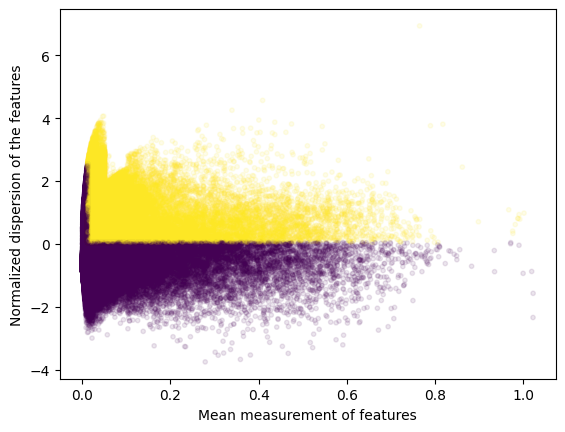

2023-03-06 16:59:12,669 cisTopic     INFO     Done!
Found 52690 variable regions


FileExistsError: [Errno 17] File exists: 'downstream_analysis/DARs/merged_male_female_cellcountfair'

<IPython.core.display.Javascript object>

In [41]:
print("find_highly_variable_features")
variable_regions = find_highly_variable_features(
    normalized_imputed_acc_obj,
    min_disp = 0.05,
    min_mean = 0.0125,
    max_mean = 3,
    max_disp = np.inf,
    n_bins=20,
    n_top_features=None,
    plot=True,
    # save=f'plots_qc/{sample}__HVR.png'
)

print(f"Found {len(variable_regions)} variable regions")
# with open(f'downstream_analysis/HVRs/{sample}__HVRs.bed', 'w') as f:
#     for line in [x.replace(':','\t').replace('-','\t') for x in variable_regions]:
#         f.write(f"{line}\t")

os.mkdir(f'downstream_analysis/DARs/{sample}')

In [42]:
contrasts

[[['10xmultiome_sampleA_Cytotoxic T cell'],
  ['10xmultiome_sampleB_Cytotoxic T cell']],
 [['10xmultiome_sampleB_Cytotoxic T cell'],
  ['10xmultiome_sampleA_Cytotoxic T cell']],
 [['10xmultiome_sampleA_CD4+ T cell'], ['10xmultiome_sampleB_CD4+ T cell']],
 [['10xmultiome_sampleB_CD4+ T cell'], ['10xmultiome_sampleA_CD4+ T cell']],
 [['10xmultiome_sampleA_Natural killer cell'],
  ['10xmultiome_sampleB_Natural killer cell']],
 [['10xmultiome_sampleB_Natural killer cell'],
  ['10xmultiome_sampleA_Natural killer cell']],
 [['10xmultiome_sampleA_CD14+ monocyte'],
  ['10xmultiome_sampleB_CD14+ monocyte']],
 [['10xmultiome_sampleB_CD14+ monocyte'],
  ['10xmultiome_sampleA_CD14+ monocyte']],
 [['10xmultiome_sampleA_B cell'], ['10xmultiome_sampleB_B cell']],
 [['10xmultiome_sampleB_B cell'], ['10xmultiome_sampleA_B cell']],
 [['10xmultiome_sampleA_CD16+ monocyte'],
  ['10xmultiome_sampleB_CD16+ monocyte']],
 [['10xmultiome_sampleB_CD16+ monocyte'],
  ['10xmultiome_sampleA_CD16+ monocyte']],
 [['

<IPython.core.display.Javascript object>

In [ ]:
outpath=f"downstream_analysis_male_female_countfair/DARs/{sample}__DARs_dict_1-0xfc.pkl"
markers_dict = find_diff_features(
    cto,
    normalized_imputed_acc_obj,
    variable='tech_fmx_sample_harmony_consensus_cell_type__mega',
    var_features=variable_regions,
    contrasts=contrasts,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1),
    n_cpu=16,
)
with open(
        outpath,'wb'
) as f:
    pickle.dump(markers_dict, f, protocol=4)

for cell_type in markers_dict.keys():
    markers = markers_dict[cell_type].index.tolist()
    df = pd.DataFrame(markers)
    if len(df) == 0:
        print(f"no DARs found for {cell_type} in {sample}")
    else:
        df[[0,1]] = df[0].str.split(':',expand=True)
        df[[1,2]] = df[1].str.split('-',expand=True)
        df[3] = markers_dict[cell_type].index.tolist()
        df[3] = cell_type.replace(' ', '_')# + '_' + df[3].astype(str)
        score = markers_dict[cell_type]['Log2FC']
        score = score.reset_index(drop=True)
        df[4] = score
        df[5] = '.'
        pval = markers_dict[cell_type]['Adjusted_pval']
        pval = pval.reset_index(drop=True)
        df[6] = pval
        name = cell_type.replace(' ', '_')
        # name = name.replace('/', '-')
        if not os.path.exists(f'downstream_analysis_male_female_countfair/DARs/'):
            os.mkdir(f'downstream_analysis_male_female_countfair/DARs/')

        df.to_csv(f'downstream_analysis_male_female_countfair/DARs/{sample}__{cell_type.replace(" ", "_")}__DARs_1-0xfc.bed', sep='\t', header=False, index=False)
        df[0:2000].to_csv(f'downstream_analysis_male_female_countfair/DARs/{sample}__{cell_type.replace(" ", "_")}__DARs_1-0xfc.TOP2k.bed', sep='\t', header=False, index=False)

2023-03-06 17:00:18,943	INFO worker.py:1509 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(markers_ray pid=36719) 2023-03-06 17:00:28,000 cisTopic     INFO     Formatting data for 10xmultiome_sampleA_Cytotoxic T cell_VS_10xmultiome_sampleB_Cytotoxic T cell
(markers_ray pid=36719) 2023-03-06 17:00:31,506 cisTopic     INFO     Computing p-value for 10xmultiome_sampleA_Cytotoxic T cell_VS_10xmultiome_sampleB_Cytotoxic T cell
(markers_ray pid=36713) 2023-03-06 17:00:33,722 cisTopic     INFO     Formatting data for 10xmultiome_sampleB_Cytotoxic T cell_VS_10xmultiome_sampleA_Cytotoxic T cell
(markers_ray pid=36713) 2023-03-06 17:00:36,826 cisTopic     INFO     Computing p-value for 10xmultiome_sampleB_Cytotoxic T cell_VS_10xmultiome_sampleA_Cytotoxic T cell
(markers_ray pid=36712) 2023-03-06 17:00:39,030 cisTopic     INFO     Formatting data for 10xmultiome_sampleA_CD4+ T cell_VS_10xmultiome_sampleB_CD4+ T cell
(markers_ray pid=36712) 2023-03-06 17:00:43,864 cisTopic     INFO     Computing p-value for 10xmultiome_sampleA_CD4+ T cell_VS_10xmultiome_sampleB_CD4+ T cell
(markers_ray

(raylet) Spilled 24319 MiB, 1 objects, write throughput 828 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
(raylet) Spilled 48639 MiB, 2 objects, write throughput 1522 MiB/s.


(markers_ray pid=36712) 2023-03-06 17:01:25,009 cisTopic     INFO     Computing log2FC for 10xmultiome_sampleA_CD4+ T cell_VS_10xmultiome_sampleB_CD4+ T cell
(markers_ray pid=36712) 2023-03-06 17:01:26,200 cisTopic     INFO     10xmultiome_sampleA_CD4+ T cell_VS_10xmultiome_sampleB_CD4+ T cell done!
(markers_ray pid=36712) 2023-03-06 17:01:26,945 cisTopic     INFO     Formatting data for 10xmultiome_sampleA_CD14+ monocyte_VS_10xmultiome_sampleB_CD14+ monocyte
(markers_ray pid=36717) 2023-03-06 17:01:26,947 cisTopic     INFO     Formatting data for 10xmultiome_sampleB_Natural killer cell_VS_10xmultiome_sampleA_Natural killer cell
(markers_ray pid=36717) 2023-03-06 17:01:28,455 cisTopic     INFO     Computing p-value for 10xmultiome_sampleB_Natural killer cell_VS_10xmultiome_sampleA_Natural killer cell
(markers_ray pid=36712) 2023-03-06 17:01:30,449 cisTopic     INFO     Computing p-value for 10xmultiome_sampleA_CD14+ monocyte_VS_10xmultiome_sampleB_CD14+ monocyte
(markers_ray pid=36709)

(raylet) Spilled 48642 MiB, 7 objects, write throughput 1521 MiB/s.


(markers_ray pid=36717) 2023-03-06 17:01:55,871 cisTopic     INFO     Computing log2FC for 10xmultiome_sampleB_Natural killer cell_VS_10xmultiome_sampleA_Natural killer cell
(markers_ray pid=36717) 2023-03-06 17:01:57,211 cisTopic     INFO     10xmultiome_sampleB_Natural killer cell_VS_10xmultiome_sampleA_Natural killer cell done!
(markers_ray pid=36712) 2023-03-06 17:02:09,627 cisTopic     INFO     Computing log2FC for 10xmultiome_sampleA_CD14+ monocyte_VS_10xmultiome_sampleB_CD14+ monocyte
(markers_ray pid=36712) 2023-03-06 17:02:11,133 cisTopic     INFO     10xmultiome_sampleA_CD14+ monocyte_VS_10xmultiome_sampleB_CD14+ monocyte done!


(raylet) Spilled 48643 MiB, 9 objects, write throughput 1521 MiB/s.
(raylet) Spilled 48643 MiB, 10 objects, write throughput 1521 MiB/s.


(markers_ray pid=36712) 2023-03-06 17:04:19,550 cisTopic     INFO     Formatting data for 10xmultiome_sampleB_CD14+ monocyte_VS_10xmultiome_sampleA_CD14+ monocyte
(markers_ray pid=36712) 2023-03-06 17:04:28,629 cisTopic     INFO     Computing p-value for 10xmultiome_sampleB_CD14+ monocyte_VS_10xmultiome_sampleA_CD14+ monocyte
(markers_ray pid=36712) 2023-03-06 17:05:05,091 cisTopic     INFO     Computing log2FC for 10xmultiome_sampleB_CD14+ monocyte_VS_10xmultiome_sampleA_CD14+ monocyte
(markers_ray pid=36712) 2023-03-06 17:05:06,277 cisTopic     INFO     10xmultiome_sampleB_CD14+ monocyte_VS_10xmultiome_sampleA_CD14+ monocyte done!
(markers_ray pid=36712) 2023-03-06 17:07:14,694 cisTopic     INFO     Formatting data for 10xmultiome_sampleA_B cell_VS_10xmultiome_sampleB_B cell
(markers_ray pid=36712) 2023-03-06 17:07:17,772 cisTopic     INFO     Computing p-value for 10xmultiome_sampleA_B cell_VS_10xmultiome_sampleB_B cell
(markers_ray pid=36712) 2023-03-06 17:07:47,332 cisTopic     IN

(raylet) Spilled 72972 MiB, 22 objects, write throughput 1125 MiB/s.


(markers_ray pid=36712) 2023-03-06 18:13:11,216 cisTopic     INFO     Computing log2FC for 10xv11_sampleA_CD4+ T cell_VS_10xv11_sampleB_CD4+ T cell
(markers_ray pid=36712) 2023-03-06 18:13:12,453 cisTopic     INFO     10xv11_sampleA_CD4+ T cell_VS_10xv11_sampleB_CD4+ T cell done!
(markers_ray pid=36712) 2023-03-06 18:15:58,501 cisTopic     INFO     Formatting data for 10xv11_sampleB_CD4+ T cell_VS_10xv11_sampleA_CD4+ T cell
(markers_ray pid=36712) 2023-03-06 18:16:04,348 cisTopic     INFO     Computing p-value for 10xv11_sampleB_CD4+ T cell_VS_10xv11_sampleA_CD4+ T cell
(markers_ray pid=36712) 2023-03-06 18:16:47,519 cisTopic     INFO     Computing log2FC for 10xv11_sampleB_CD4+ T cell_VS_10xv11_sampleA_CD4+ T cell
(markers_ray pid=36712) 2023-03-06 18:16:48,728 cisTopic     INFO     10xv11_sampleB_CD4+ T cell_VS_10xv11_sampleA_CD4+ T cell done!
(markers_ray pid=36712) 2023-03-06 18:19:26,401 cisTopic     INFO     Formatting data for 10xv11_sampleA_Natural killer cell_VS_10xv11_sampleB

(raylet) Spilled 145937 MiB, 37 objects, write throughput 878 MiB/s.


(markers_ray pid=36712) 2023-03-06 18:55:33,732 cisTopic     INFO     Computing log2FC for hydrop_sampleA_CD4+ T cell_VS_hydrop_sampleB_CD4+ T cell
(markers_ray pid=36712) 2023-03-06 18:55:34,997 cisTopic     INFO     hydrop_sampleA_CD4+ T cell_VS_hydrop_sampleB_CD4+ T cell done!
(markers_ray pid=36712) 2023-03-06 18:58:04,901 cisTopic     INFO     Formatting data for hydrop_sampleB_CD4+ T cell_VS_hydrop_sampleA_CD4+ T cell
(markers_ray pid=36712) 2023-03-06 18:58:10,515 cisTopic     INFO     Computing p-value for hydrop_sampleB_CD4+ T cell_VS_hydrop_sampleA_CD4+ T cell
(markers_ray pid=36712) 2023-03-06 18:59:01,137 cisTopic     INFO     Computing log2FC for hydrop_sampleB_CD4+ T cell_VS_hydrop_sampleA_CD4+ T cell
(markers_ray pid=36712) 2023-03-06 18:59:02,376 cisTopic     INFO     hydrop_sampleB_CD4+ T cell_VS_hydrop_sampleA_CD4+ T cell done!
(markers_ray pid=36712) 2023-03-06 19:00:59,638 cisTopic     INFO     Formatting data for hydrop_sampleA_Natural killer cell_VS_hydrop_sampleB

In [ ]:
with open(
        "downstream_analysis_male_female_countfair/cto_male_female_cellcountfair.pkl",'wb'
) as f:
    pickle.dump(cto, f, protocol=4)